## Solar Time Series Annualy

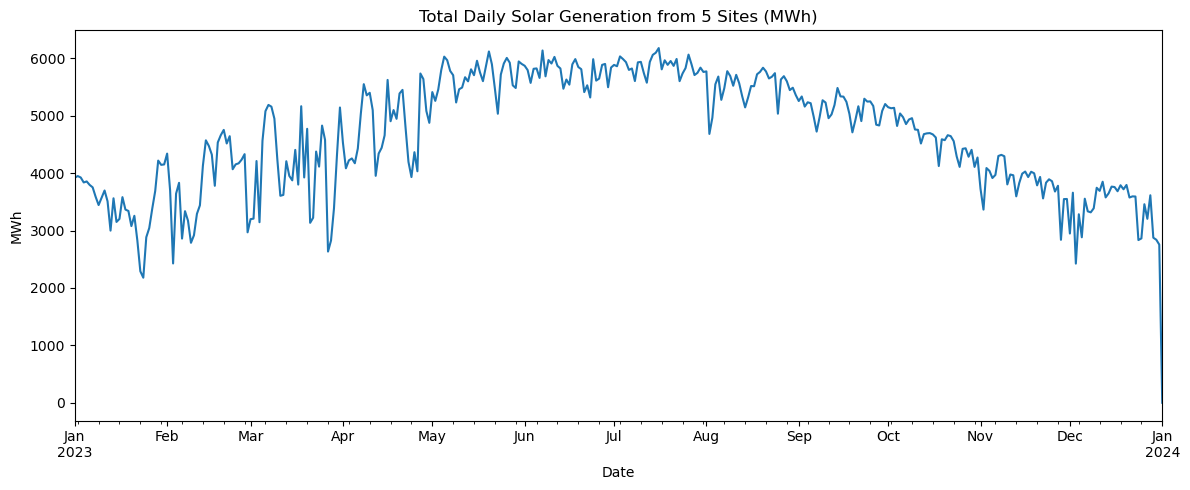

✔ Combined hourly solar generation saved to 'combined_solar_generation_profile.csv'


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce

# --------------------------
# Define input files & capacity
# --------------------------
file_paths = {
    "Dodoma": "Solar_Dodoma.csv",
    "Singida": "Solar_Singida.csv",
    "Shinyanga": "Solar_Shinyanga.csv",
    "Tabora": "Solar_Tabora.csv",
    "Morogoro": "Solar_Morogoro.csv"
}

# Installed capacity at each site (MW)
installed_capacity = {
    "Dodoma": 200,
    "Singida": 200,
    "Shinyanga": 200,
    "Tabora": 200,
    "Morogoro": 200
}

# --------------------------
# Read, scale & collect data
# --------------------------
dfs = {}

for region, path in file_paths.items():
    df = pd.read_csv(path, skiprows=3)  # skip metadata rows
    
    # Convert time_local column to datetime
    df['time_local'] = pd.to_datetime(df['time'], utc=True).dt.tz_convert('Africa/Dar_es_Salaam')
    
    # Compute actual generation in MWh
    df['generation_MWh'] = df['electricity'] * installed_capacity[region]
    
    # Keep only timestamp and generation, rename column to region
    dfs[region] = df[['time_local', 'generation_MWh']].rename(columns={'generation_MWh': region})

# --------------------------
# Merge all regional data
# --------------------------
df_merged = reduce(lambda left, right: pd.merge(left, right, on='time_local'), dfs.values())

# --------------------------
# Compute total solar generation (hourly & daily)
# --------------------------
df_merged['total_solar_MWh'] = df_merged[list(file_paths.keys())].sum(axis=1)

# Daily totals
df_daily = df_merged.set_index('time_local').resample('D')['total_solar_MWh'].sum()

# --------------------------
# Plot daily generation
# --------------------------
plt.figure(figsize=(12, 5))
df_daily.plot(title='Total Daily Solar Generation from 5 Sites (MWh)', legend=False)
plt.ylabel('MWh')
plt.xlabel('Date')
plt.grid(False)
plt.tight_layout()
plt.show()

# --------------------------
# Save combined profile
# --------------------------
df_merged.to_csv('combined_solar_generation_profile.csv', index=False)
print("✔ Combined hourly solar generation saved to 'combined_solar_generation_profile.csv'")


## Solar (Dry and Wet Season)

Available months: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


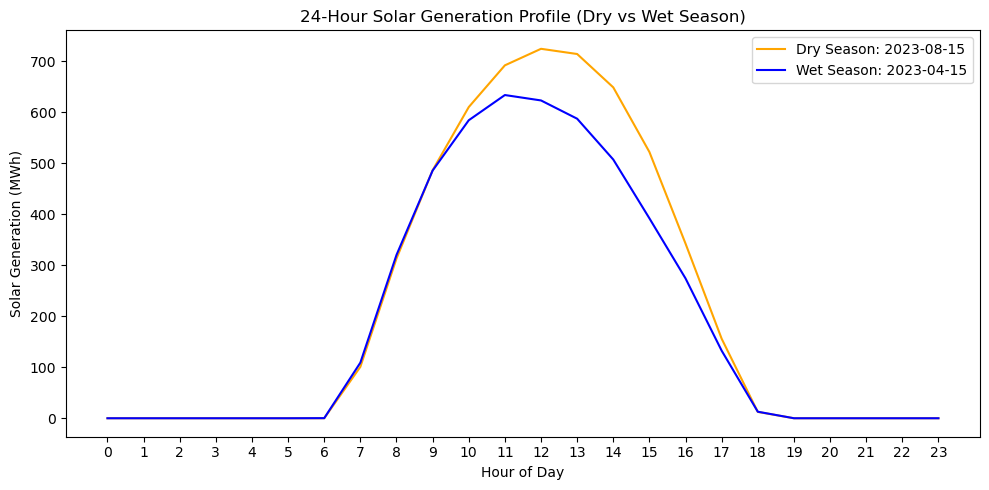

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce

# Load the combined CSV
df = pd.read_csv('combined_solar_generation_profile.csv')
df['time_local'] = pd.to_datetime(df['time_local'])

# Set datetime index
df = df.set_index('time_local')

# --- OPTIONAL: Print available months to pick a dry/wet day
print("Available months:", df.index.month.unique().tolist())

# -----------------------------------
# Define sample dry and wet season dates (adjust if needed)
# -----------------------------------
solar_dry_day = '2023-08-15'   # e.g., September – dry
solar_wet_day = '2023-04-15'   # e.g., March – wet

# Extract 24-hour data for each day
df_dry = df.loc[dry_day].copy()
df_wet = df.loc[wet_day].copy()

# -----------------------------
# Plot 24-Hour Generation Profiles
# -----------------------------
plt.figure(figsize=(10, 5))
plt.plot(df_dry.index.hour, df_dry['total_solar_MWh'], label=f'Dry Season: {dry_day}', color='orange')
plt.plot(df_wet.index.hour, df_wet['total_solar_MWh'], label=f'Wet Season: {wet_day}', color='blue')
plt.xlabel('Hour of Day')
plt.ylabel('Solar Generation (MWh)')
plt.title('24-Hour Solar Generation Profile (Dry vs Wet Season)')
plt.grid(False)
plt.xticks(np.arange(0, 24, 1))
plt.legend()
plt.tight_layout()
plt.show()


## Wind Annual Time Series

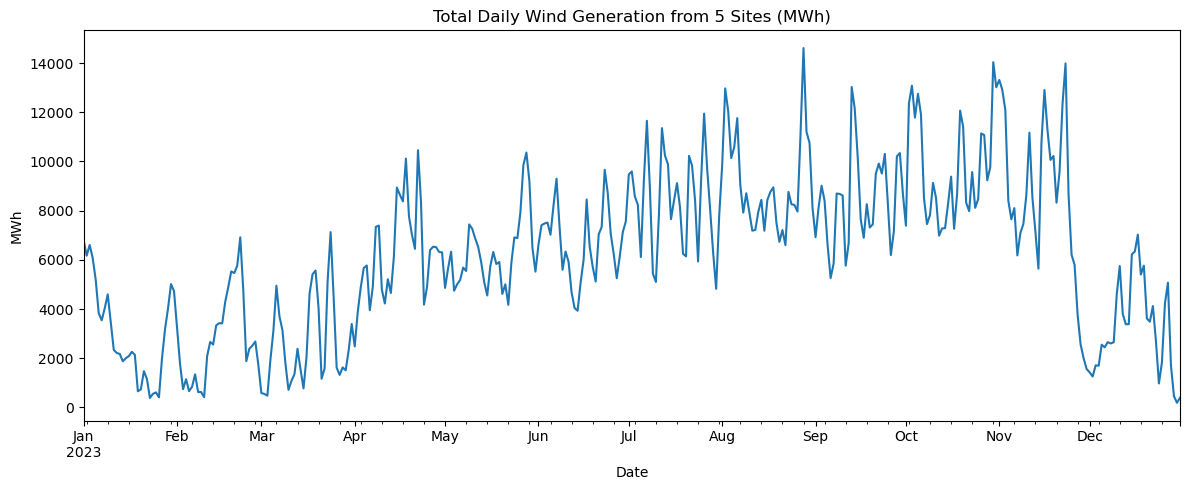

Saved: combined_wind_generation_profile.csv


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce

# File paths
file_paths = {
    "Singida": "Wind_Singida.csv",
    "Njombe": "Wind_Njombe.csv",
    "Dodoma": "Wind_Dodoma.csv",
    "Iringa": "Wind_Iringa.csv",
    "Manyara": "Wind_Manyara.csv"
}

# Assumed installed capacity in MW
installed_capacity = {
    "Singida": 200,
    "Njombe": 200,
    "Dodoma": 200,
    "Iringa": 200,
    "Manyara": 200
}

# Store processed DataFrames
dfs = {}

for region, path in file_paths.items():
    df = pd.read_csv(path, skiprows=3)
    
    # Rename column if necessary
    if 'time_local' in df.columns:
        df['time_local'] = pd.to_datetime(df['time_local'])
        time_col = 'time_local'
    else:
        df['time'] = pd.to_datetime(df['time'])
        time_col = 'time'

    # Compute generation in MWh
    df['generation_MWh'] = df['electricity'] * installed_capacity[region]
    
    # Keep only time and generation
    dfs[region] = df[[time_col, 'generation_MWh']].rename(columns={
        time_col: 'time_local',
        'generation_MWh': region
    })

# Merge all on time_local
df_merged = reduce(lambda left, right: pd.merge(left, right, on='time_local'), dfs.values())

# Sum across regions
df_merged['total_wind_MWh'] = df_merged[list(file_paths.keys())].sum(axis=1)

# Plot daily profile
df_daily = df_merged.set_index('time_local').resample('D')['total_wind_MWh'].sum()
df_daily.plot(title='Total Daily Wind Generation from 5 Sites (MWh)', figsize=(12, 5))
plt.ylabel('MWh')
plt.xlabel('Date')
plt.grid(False)
plt.tight_layout()
plt.show()

# Save merged data
df_merged.to_csv('combined_wind_generation_profile.csv', index=False)
print("Saved: combined_wind_generation_profile.csv")


## Wind (Dry and Wet Season)

Available months: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


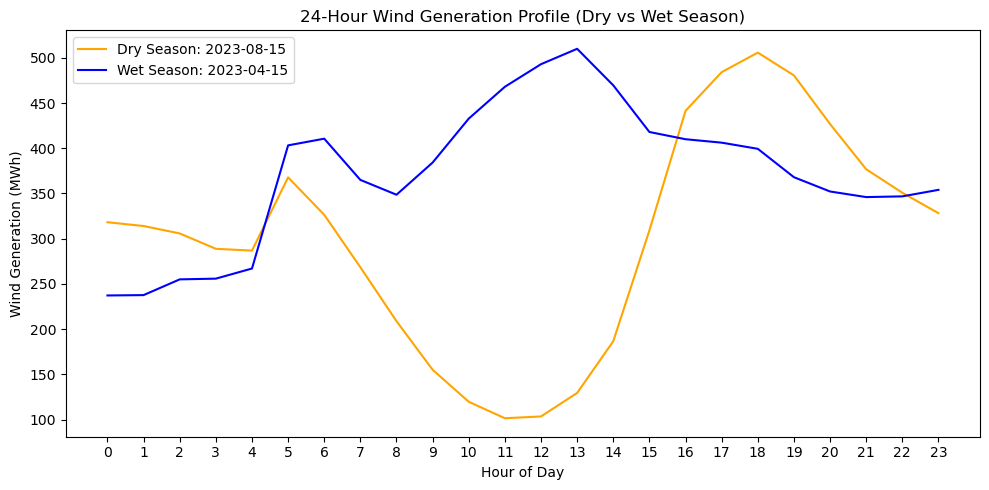

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce

# Load the combined CSV
df = pd.read_csv('combined_wind_generation_profile.csv')
df['time_local'] = pd.to_datetime(df['time_local'])

# Set datetime index
df = df.set_index('time_local')

# --- OPTIONAL: Print available months to pick a dry/wet day
print("Available months:", df.index.month.unique().tolist())

# -----------------------------------
# Define sample dry and wet season dates (adjust if needed)
# -----------------------------------
wind_dry_day = '2023-08-15'   # e.g., September – dry
wind_wet_day = '2023-04-15'   # e.g., March – wet

# Extract 24-hour data for each day
df_dry = df.loc[dry_day].copy()
df_wet = df.loc[wet_day].copy()

# -----------------------------
# Plot 24-Hour Generation Profiles
# -----------------------------
plt.figure(figsize=(10, 5))
plt.plot(df_dry.index.hour, df_dry['total_wind_MWh'], label=f'Dry Season: {dry_day}', color='orange')
plt.plot(df_wet.index.hour, df_wet['total_wind_MWh'], label=f'Wet Season: {wet_day}', color='blue')
plt.xlabel('Hour of Day')
plt.ylabel('Wind Generation (MWh)')
plt.title('24-Hour Wind Generation Profile (Dry vs Wet Season)')
plt.grid(False)
plt.xticks(np.arange(0, 24, 1))
plt.legend()
plt.tight_layout()
plt.show()


## Solar and Wind

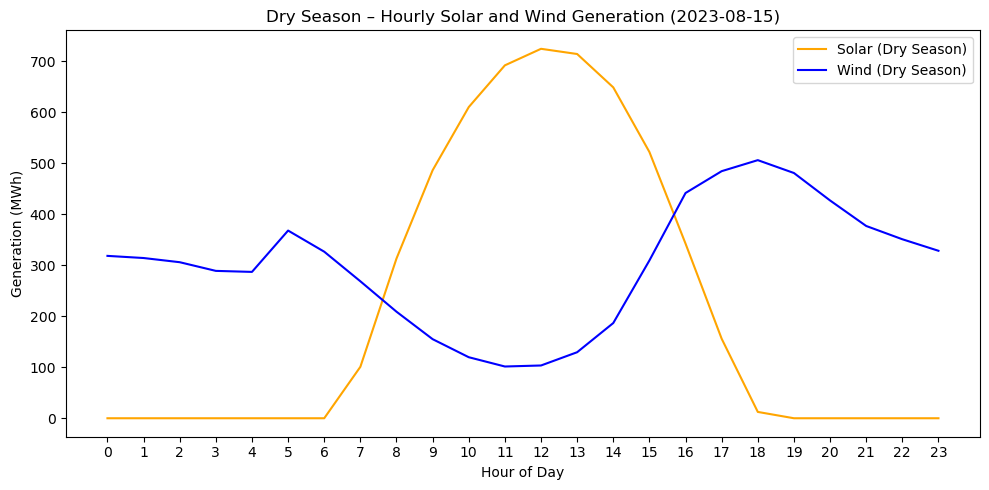

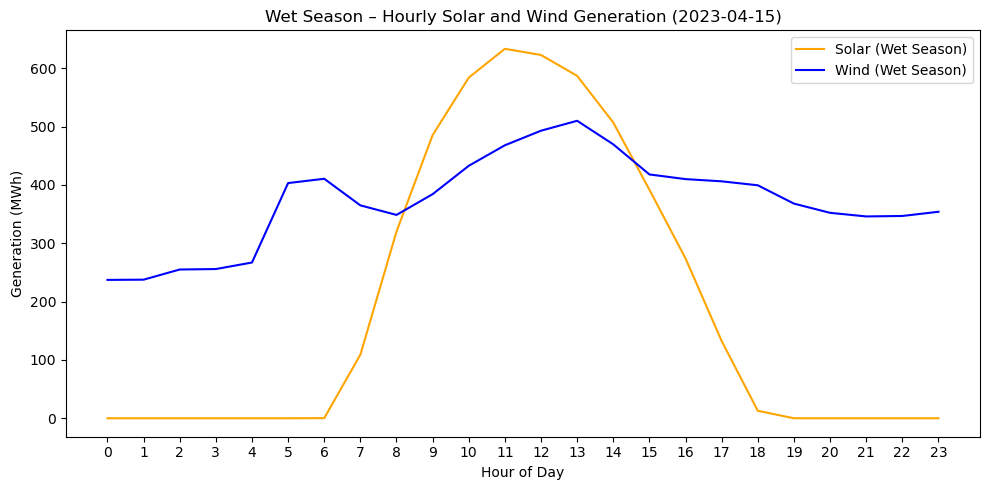

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------
# Load Solar and Wind Generation Data
# -------------------------------
solar_df = pd.read_csv('combined_solar_generation_profile.csv')
wind_df = pd.read_csv('combined_wind_generation_profile.csv')

# Parse datetime and set index
solar_df['time_local'] = pd.to_datetime(solar_df['time_local'])
wind_df['time_local'] = pd.to_datetime(wind_df['time_local'])
solar_df = solar_df.set_index('time_local')
wind_df = wind_df.set_index('time_local')

# -------------------------------
# Define Dry and Wet Days
# -------------------------------
dry_day = '2023-08-15'
wet_day = '2023-04-15'

# -------------------------------
# Extract 24-Hour Profiles for Each Day
# -------------------------------
# Dry
solar_dry = solar_df.loc[dry_day]['total_solar_MWh']
wind_dry = wind_df.loc[dry_day]['total_wind_MWh']

# Wet
solar_wet = solar_df.loc[wet_day]['total_solar_MWh']
wind_wet = wind_df.loc[wet_day]['total_wind_MWh']

# -------------------------------
# Plot: Dry Season (Solar + Wind)
# -------------------------------
plt.figure(figsize=(10, 5))
plt.plot(solar_dry.index.hour, solar_dry.values, label='Solar (Dry Season)', color='orange')
plt.plot(wind_dry.index.hour, wind_dry.values, label='Wind (Dry Season)', color='blue')
plt.xlabel('Hour of Day')
plt.ylabel('Generation (MWh)')
plt.title('Dry Season – Hourly Solar and Wind Generation (2023-08-15)')
plt.legend()
plt.grid(False)
plt.xticks(np.arange(0, 24, 1))
plt.tight_layout()
plt.show()

# -------------------------------
# Plot: Wet Season (Solar + Wind)
# -------------------------------
plt.figure(figsize=(10, 5))
plt.plot(solar_wet.index.hour, solar_wet.values, label='Solar (Wet Season)', color='orange')
plt.plot(wind_wet.index.hour, wind_wet.values, label='Wind (Wet Season)', color='blue')
plt.xlabel('Hour of Day')
plt.ylabel('Generation (MWh)')
plt.title('Wet Season – Hourly Solar and Wind Generation (2023-04-15)')
plt.legend()
plt.grid(False)
plt.xticks(np.arange(0, 24, 1))
plt.tight_layout()
plt.show()


## Solar, Wind, Demand 

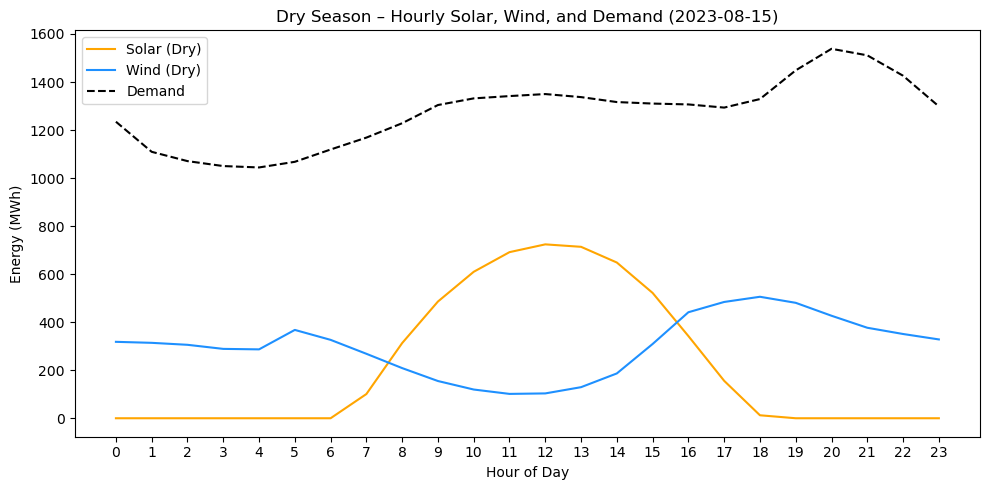

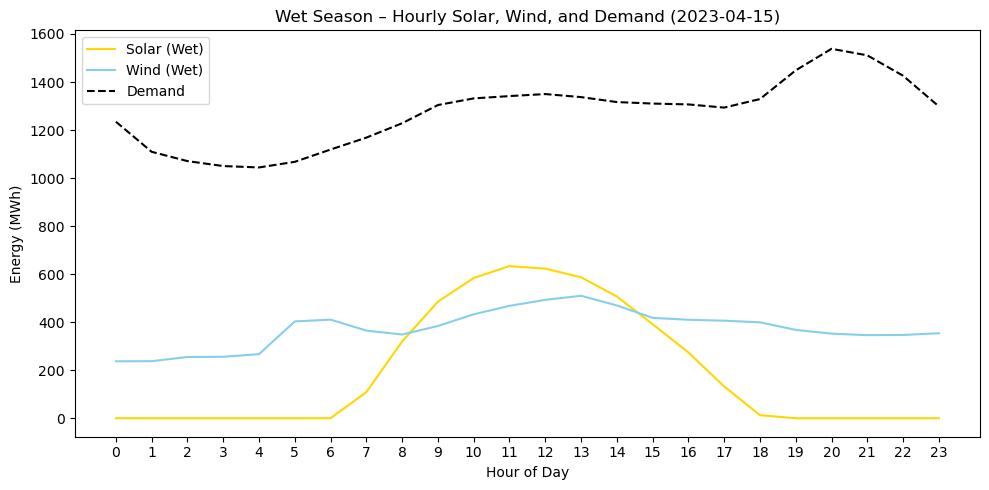

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------
# Load Solar and Wind Generation Data
# -------------------------------
solar_df = pd.read_csv('combined_solar_generation_profile.csv')
wind_df = pd.read_csv('combined_wind_generation_profile.csv')
demand_df = pd.read_csv('Tanzania_Demand_2023.csv')

# -------------------------------
# Parse datetime and set index
# -------------------------------
solar_df['time_local'] = pd.to_datetime(solar_df['time_local'])
wind_df['time_local'] = pd.to_datetime(wind_df['time_local'])
demand_df['Time'] = pd.to_datetime(demand_df['Time'])

solar_df = solar_df.set_index('time_local')
wind_df = wind_df.set_index('time_local')
demand_df = demand_df.set_index('Time')

# Convert Demand MW to MWh (assuming each value is for 1 hour)
demand_df['Demand_MWh'] = demand_df['Demand_MW'] * 1

# -------------------------------
# Define Dry and Wet Days
# -------------------------------
dry_day = '2023-08-15'
wet_day = '2023-04-15'

# -------------------------------
# Extract 24-Hour Profiles for Each Day
# -------------------------------
# Dry
solar_dry = solar_df.loc[dry_day]['total_solar_MWh']
wind_dry = wind_df.loc[dry_day]['total_wind_MWh']

# Wet
solar_wet = solar_df.loc[wet_day]['total_solar_MWh']
wind_wet = wind_df.loc[wet_day]['total_wind_MWh']

# Demand: use same 24-hour period from demand data
demand_24h = demand_df.loc['2023-01-01']['Demand_MWh']

# -------------------------------
# Plot: Dry Season (Solar + Wind + Demand)
# -------------------------------
plt.figure(figsize=(10, 5))
plt.plot(solar_dry.index.hour, solar_dry.values, label='Solar (Dry)', color='orange')
plt.plot(wind_dry.index.hour, wind_dry.values, label='Wind (Dry)', color='dodgerblue')
plt.plot(demand_24h.index.hour, demand_24h.values, label='Demand', color='black', linestyle='--')
plt.xlabel('Hour of Day')
plt.ylabel('Energy (MWh)')
plt.title('Dry Season – Hourly Solar, Wind, and Demand (2023-08-15)')
plt.legend()
plt.grid(False)
plt.xticks(np.arange(0, 24, 1))
plt.tight_layout()
plt.show()

# -------------------------------
# Plot: Wet Season (Solar + Wind + Demand)
# -------------------------------
plt.figure(figsize=(10, 5))
plt.plot(solar_wet.index.hour, solar_wet.values, label='Solar (Wet)', color='gold')
plt.plot(wind_wet.index.hour, wind_wet.values, label='Wind (Wet)', color='skyblue')
plt.plot(demand_24h.index.hour, demand_24h.values, label='Demand', color='black', linestyle='--')
plt.xlabel('Hour of Day')
plt.ylabel('Energy (MWh)')
plt.title('Wet Season – Hourly Solar, Wind, and Demand (2023-04-15)')
plt.legend()
plt.grid(False)
plt.xticks(np.arange(0, 24, 1))
plt.tight_layout()
plt.show()


## Hybrid (Solar+ Wind) - Demand 

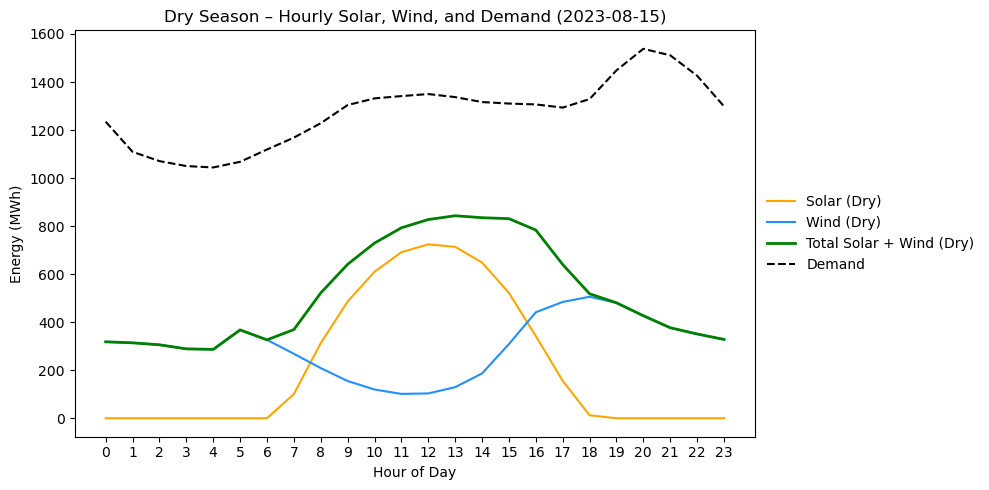

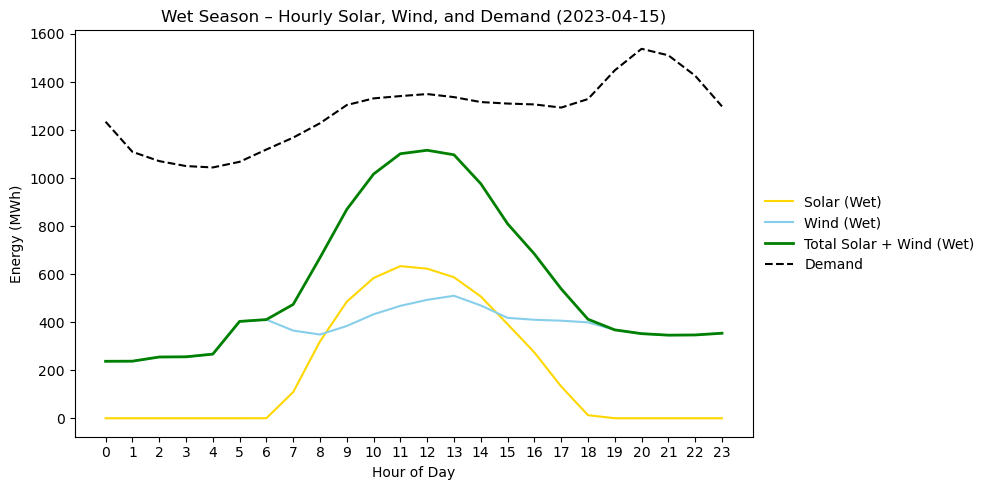

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------
# Load Solar and Wind Generation Data
# -------------------------------
solar_df = pd.read_csv('combined_solar_generation_profile.csv')
wind_df = pd.read_csv('combined_wind_generation_profile.csv')
demand_df = pd.read_csv('Tanzania_Demand_2023.csv')

# -------------------------------
# Parse datetime and set index
# -------------------------------
solar_df['time_local'] = pd.to_datetime(solar_df['time_local'])
wind_df['time_local'] = pd.to_datetime(wind_df['time_local'])
demand_df['Time'] = pd.to_datetime(demand_df['Time'])

solar_df = solar_df.set_index('time_local')
wind_df = wind_df.set_index('time_local')
demand_df = demand_df.set_index('Time')

# Remove timezone info to avoid alignment issues
solar_df.index = solar_df.index.tz_localize(None)
wind_df.index = wind_df.index.tz_localize(None)
demand_df.index = demand_df.index.tz_localize(None)

# Convert Demand MW to MWh (assuming each value is for 1 hour)
demand_df['Demand_MWh'] = demand_df['Demand_MW'] * 1

# -------------------------------
# Define Dry and Wet Days
# -------------------------------
dry_day = '2023-08-15'
wet_day = '2023-04-15'

# -------------------------------
# Extract 24-Hour Profiles for Each Day
# -------------------------------
# Dry
solar_dry = solar_df.loc[dry_day]['total_solar_MWh']
wind_dry = wind_df.loc[dry_day]['total_wind_MWh']
total_gen_dry = solar_dry + wind_dry

# Wet
solar_wet = solar_df.loc[wet_day]['total_solar_MWh']
wind_wet = wind_df.loc[wet_day]['total_wind_MWh']
total_gen_wet = solar_wet + wind_wet

# Demand: use same 24-hour period from demand data
demand_24h = demand_df.loc['2023-01-01']['Demand_MWh']

# -------------------------------
# Plot: Dry Season (Solar + Wind + Demand)
# -------------------------------
plt.figure(figsize=(10, 5))
plt.plot(solar_dry.index.hour, solar_dry.values, label='Solar (Dry)', color='orange')
plt.plot(wind_dry.index.hour, wind_dry.values, label='Wind (Dry)', color='dodgerblue')
plt.plot(total_gen_dry.index.hour, total_gen_dry.values, label='Total Solar + Wind (Dry)', color='green', linewidth=2)
plt.plot(demand_24h.index.hour, demand_24h.values, label='Demand', color='black', linestyle='--')
plt.xlabel('Hour of Day')
plt.ylabel('Energy (MWh)')
plt.title('Dry Season – Hourly Solar, Wind, and Demand (2023-08-15)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.grid(False)
plt.xticks(np.arange(0, 24, 1))
plt.tight_layout()
plt.show()

# -------------------------------
# Plot: Wet Season (Solar + Wind + Demand)
# -------------------------------
plt.figure(figsize=(10, 5))
plt.plot(solar_wet.index.hour, solar_wet.values, label='Solar (Wet)', color='gold')
plt.plot(wind_wet.index.hour, wind_wet.values, label='Wind (Wet)', color='skyblue')
plt.plot(total_gen_wet.index.hour, total_gen_wet.values, label='Total Solar + Wind (Wet)', color='green', linewidth=2)
plt.plot(demand_24h.index.hour, demand_24h.values, label='Demand', color='black', linestyle='--')
plt.xlabel('Hour of Day')
plt.ylabel('Energy (MWh)')
plt.title('Wet Season – Hourly Solar, Wind, and Demand (2023-04-15)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.grid(False)
plt.xticks(np.arange(0, 24, 1))
plt.tight_layout()
plt.show()


## Total Hybrid Model (Solar+ Wind + Hydro - Demand)

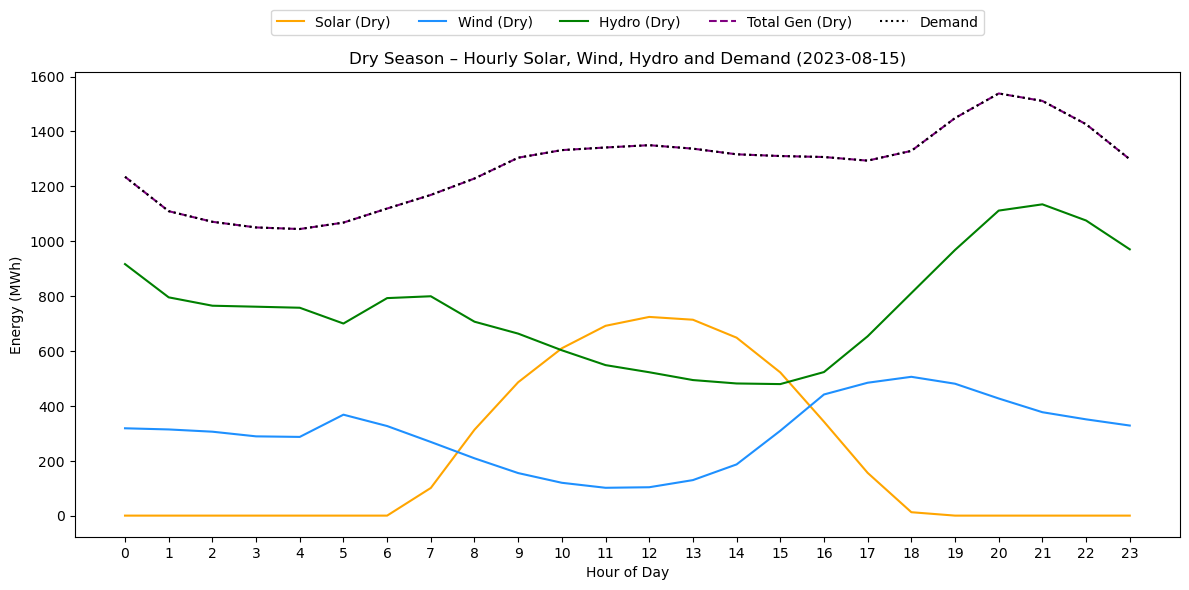

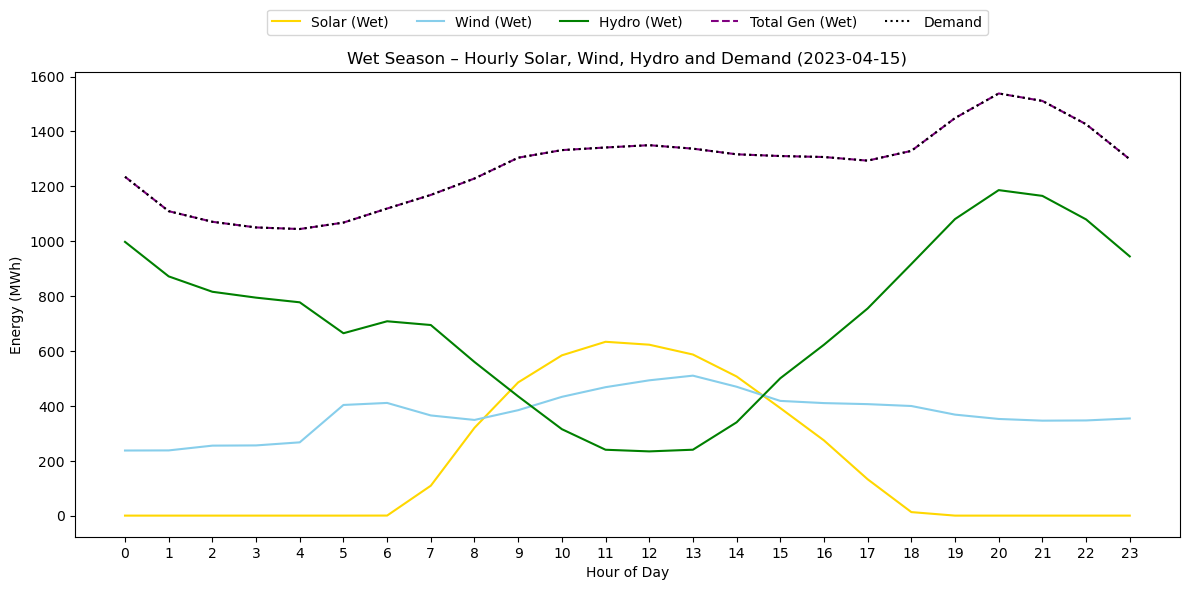

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Load Data
# -------------------------------
solar_df = pd.read_csv('combined_solar_generation_profile.csv')
wind_df = pd.read_csv('combined_wind_generation_profile.csv')
demand_df = pd.read_csv('Tanzania_Demand_2023.csv')

# Convert time columns
solar_df['time_local'] = pd.to_datetime(solar_df['time_local']).dt.tz_localize(None)
wind_df['time_local'] = pd.to_datetime(wind_df['time_local']).dt.tz_localize(None)
demand_df['Time'] = pd.to_datetime(demand_df['Time']).dt.tz_localize(None)

# Set index
solar_df = solar_df.set_index('time_local')
wind_df = wind_df.set_index('time_local')
demand_df = demand_df.set_index('Time')

# Convert demand to MWh
demand_df['Demand_MWh'] = demand_df['Demand_MW'] * 1  # hourly

# -------------------------------
# Hydro Parameters
# -------------------------------
installed_capacity_mw = 2115
turbine_efficiency = 0.9
reservoir_capacity_m3 = 30.67e9
dead_storage_m3 = 12.11e9
normal_storage_m3 = 30.67e9
initial_storage_m3 = 25e9
seconds_per_hour = 3600
rho = 1000
g = 9.81

normal_storage_elevation_m = 184.0
dead_storage_elevation_m = 163.0

def tailwater_elevation(Q_m3s):
    return 68.9097 + 0.314763 * Q_m3s**0.4620

def storage_to_elevation(storage_m3):
    if storage_m3 >= normal_storage_m3:
        return normal_storage_elevation_m
    elif storage_m3 <= dead_storage_m3:
        return dead_storage_elevation_m
    else:
        return dead_storage_elevation_m + (storage_m3 - dead_storage_m3) / (normal_storage_m3 - dead_storage_m3) * (normal_storage_elevation_m - dead_storage_elevation_m)

def simulate_hydro_hourly(shortfall_mwh_series, inflow_m3s):
    n = len(shortfall_mwh_series)
    storage = np.zeros(n+1)
    storage[0] = initial_storage_m3
    hydro_gen = np.zeros(n)

    for t in range(n):
        S = storage[t]
        inflow = inflow_m3s if np.isscalar(inflow_m3s) else inflow_m3s[t]
        inflow_vol = inflow * seconds_per_hour

        reservoir_elev = storage_to_elevation(S)
        tailwater_elev = tailwater_elevation(inflow)
        head = max(0, reservoir_elev - tailwater_elev)

        if head <= 0 or S <= dead_storage_m3:
            hydro_gen[t] = 0
            storage[t+1] = min(S + inflow_vol, normal_storage_m3)
            continue

        Q_max = installed_capacity_mw * 1e6 / (rho * g * head * turbine_efficiency)
        V_max = Q_max * seconds_per_hour

        E_need = shortfall_mwh_series.iloc[t]
        V_need = E_need * 3.6e9 / (rho * g * head * turbine_efficiency)
        V_used = min(V_need, V_max, max(S - dead_storage_m3, 0))

        E_gen = V_used * rho * g * head * turbine_efficiency / 3.6e9

        hydro_gen[t] = E_gen
        storage[t+1] = min(max(S + inflow_vol - V_used, dead_storage_m3), normal_storage_m3)

    return pd.Series(hydro_gen, index=shortfall_mwh_series.index), pd.Series(storage[1:], index=shortfall_mwh_series.index)

# -------------------------------
# Choose Days
# -------------------------------
dry_day = '2023-08-15'
wet_day = '2023-04-15'
base_demand_day = '2023-01-01'

# Use same demand shape for both days
demand_sample = demand_df.loc[base_demand_day]['Demand_MWh']

# Get generation profiles
solar_dry = solar_df.loc[dry_day]['total_solar_MWh']
wind_dry = wind_df.loc[dry_day]['total_wind_MWh']
demand_dry = demand_sample.copy()
demand_dry.index = solar_dry.index  # align index

solar_wet = solar_df.loc[wet_day]['total_solar_MWh']
wind_wet = wind_df.loc[wet_day]['total_wind_MWh']
demand_wet = demand_sample.copy()
demand_wet.index = solar_wet.index  # align index

# -------------------------------
# Simulate Hydro
# -------------------------------
shortfall_dry = (demand_dry - (solar_dry + wind_dry)).clip(lower=0)
shortfall_wet = (demand_wet - (solar_wet + wind_wet)).clip(lower=0)

inflow_dry = 990    # m3/s
inflow_wet = 3849   # m3/s

hydro_dry, _ = simulate_hydro_hourly(shortfall_dry, inflow_dry)
hydro_wet, _ = simulate_hydro_hourly(shortfall_wet, inflow_wet)

# Total generation
total_gen_dry = solar_dry + wind_dry + hydro_dry
total_gen_wet = solar_wet + wind_wet + hydro_wet

# -------------------------------
# Plot Dry Day
# -------------------------------
plt.figure(figsize=(12,6))
plt.plot(solar_dry.index.hour, solar_dry.values, label='Solar (Dry)', color='orange')
plt.plot(wind_dry.index.hour, wind_dry.values, label='Wind (Dry)', color='dodgerblue')
plt.plot(hydro_dry.index.hour, hydro_dry.values, label='Hydro (Dry)', color='green')
plt.plot(total_gen_dry.index.hour, total_gen_dry.values, label='Total Gen (Dry)', color='purple', linestyle='--')
plt.plot(demand_dry.index.hour, demand_dry.values, label='Demand', color='black', linestyle=':')
plt.xlabel('Hour of Day')
plt.ylabel('Energy (MWh)')
plt.title('Dry Season – Hourly Solar, Wind, Hydro and Demand (2023-08-15)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5)
plt.grid(False)
plt.xticks(np.arange(0,24,1))
plt.tight_layout()
plt.show()

# -------------------------------
# Plot Wet Day
# -------------------------------
plt.figure(figsize=(12,6))
plt.plot(solar_wet.index.hour, solar_wet.values, label='Solar (Wet)', color='gold')
plt.plot(wind_wet.index.hour, wind_wet.values, label='Wind (Wet)', color='skyblue')
plt.plot(hydro_wet.index.hour, hydro_wet.values, label='Hydro (Wet)', color='green')
plt.plot(total_gen_wet.index.hour, total_gen_wet.values, label='Total Gen (Wet)', color='purple', linestyle='--')
plt.plot(demand_wet.index.hour, demand_wet.values, label='Demand', color='black', linestyle=':')
plt.xlabel('Hour of Day')
plt.ylabel('Energy (MWh)')
plt.title('Wet Season – Hourly Solar, Wind, Hydro and Demand (2023-04-15)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5)
plt.grid(False)
plt.xticks(np.arange(0,24,1))
plt.tight_layout()
plt.show()
